# Project I

## Set up environment


In [1]:
## We load the relevant modules

import matplotlib.pylab as plt

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn


np.random.seed(3123) # impose random seed for reproducibility

## Load data

In [2]:
# Load the data
mimic_train = pd.read_csv("/home/oliver/Documents/Computational_Machine_Learning/Data/mimic_train.csv")
mimic_test =pd.read_csv("/home/oliver/Documents/Computational_Machine_Learning/Data/mimic_X_test.csv")
mimic_diagnosis = pd.read_csv("/home/oliver/Documents/Computational_Machine_Learning/Data/MIMIC_diagnoses.csv") #extending the data

## Inspect and clean obvious columns

By reading through the assigment and inspecting the data by using .head() or .columns, we can already see that we can prepare and get rid of some columns:

In [3]:
print("dimensions of train: ", mimic_train.shape , "\ndimensions of test: ", mimic_test.shape)

dimensions of train:  (8000, 45) 
dimensions of test:  (12885, 44)


In [4]:
pd.set_option('display.max_columns', None)
mimic_train.head()


,Unnamed: 0,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.900000,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,6.1397
1,15798,0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,35.0,75.0,53.020000,16.0,103.0,70.384615,7.0,28.0,17.735849,36.611111,38.111111,37.511905,63.0,100.0,95.897959,153.0,213.0,187.000000,F,2103-03-10 00:00:00,NaN,2165-04-04 02:25:00,2165-04-16 14:41:00,NaN,-56421.13544,EMERGENCY,Private,EPISCOPALIAN,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,10.2897
2,2129,0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,43.0,70.0,51.688889,55.0,99.0,69.155556,7.0,16.0,13.716981,36.000000,38.388889,37.175926,97.0,100.0,99.674419,73.0,113.0,88.333333,M,2104-08-12 00:00:00,NaN,2177-06-23 12:33:00,2177-07-07 12:45:00,NaN,-60754.35504,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU,5.8080
3,17053,1,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,47.0,69.0,59.636364,54.0,77.0,66.000000,5.0,19.0,11.000000,35.111111,36.777778,35.981481,91.0,97.0,93.809524,68.0,68.0,68.000000,M,2105-07-06 00:00:00,2167-07-19 00:00:00,2167-07-17 21:34:00,2167-07-19 21:34:00,2167-07-19 21:34:00,-56609.91884,EMERGENCY,Private,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,2.3536
4,11609,0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,39.0,132.0,57.500000,56.0,136.0,71.959184,13.0,27.0,18.854545,36.777778,38.000000,37.487654,92.0,99.0,95.673469,73.0,117.0,92.666667,M,2112-12-12 00:00:00,2177-03-05 00:00:00,2174-03-09 12:17:00,2174-03-31 16:00:00,NaN,-59200.37377,EMERGENCY,Medicaid,NOT SPECIFIED,DIVORCED,WHITE,BILE LEAK,9974,MICU,19.3935


In [5]:
mimic_test.head()

,Unnamed: 0,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,1,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,F,2108-07-16 00:00:00,2180-03-09 00:00:00,2178-02-06 10:35:00,2178-02-13 18:30:00,NaN,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,2,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,58.0,84.0,74.800000,13.0,21.0,16.058824,36.333333,36.611111,36.472222,98.0,100.0,99.058824,103.0,103.0,103.000000,F,2087-01-16 00:00:00,NaN,2129-02-12 22:34:00,2129-02-13 16:20:00,NaN,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,3,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,64.0,88.0,72.888889,13.0,21.0,15.900000,36.444444,36.888889,36.666667,100.0,100.0,100.000000,132.0,346.0,217.636364,F,2057-09-17 00:00:00,NaN,2125-11-17 23:04:00,2125-12-05 17:55:00,NaN,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,4,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,48.0,94.0,62.783784,12.0,35.0,26.771429,36.333333,39.500000,37.833333,78.0,100.0,95.085714,108.0,139.0,125.000000,F,2056-02-27 00:00:00,2132-03-01 00:00:00,2131-01-26 08:00:00,2131-02-05 16:23:00,NaN,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,5,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,F,2066-12-19 00:00:00,2147-01-18 00:00:00,2146-05-04 02:02:00,2146-05-20 18:40:00,NaN,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654


In [6]:
mimic_diagnosis.head()

,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,256,108811,1.0,53240
1,256,108811,2.0,41071
2,256,108811,3.0,53560
3,256,108811,4.0,40390
4,256,108811,5.0,5859


Before incorporating the extended mimic_diagnosis set, we look through it manually and sort out the values which we infer we don't know the first day of a patient in an ICU. For example:

- ICD9_CODE: 7681;Fet death-anoxia dur lab;Fetal death from asphyxia or anoxia during labor

We cannot use this in our predictions, so we need to drop it.
We gatherd the following ICD9_CODES which should be removed:

More precicely, here is a list of diagnosis we excluded:

- 34882,Brain death,Brain death
- 7681;Fet death-anoxia dur lab;Fetal death from asphyxia or anoxia during labor
- 7989,Unattended death,Unattended death
- 7981,Instantaneous death,Instantaneous death
- 7616,Maternal death aff NB,Maternal death affecting fetus or newborn
- 7680,Fetal death-anoxia NOS,Fetal death from asphyxia or anoxia before onset of labor or at unspecified time
- 65641,Intrauter death-deliver,"Intrauterine death, affecting management of mother, delivered, with or without m ention of antepartum condition"
- 65640,Intrauterine death-unsp,"Intrauterine death, affecting management of mother, unspecified as to episode of care or not applicable"
- 7982,Death within 24 hr sympt,"Death occurring in less than 24 hours from onset of symptoms, not otherwise explained"
- 7681,Fet death-anoxia dur lab,Fetal death from asphyxia or anoxia during labor
- 65643,Intrauter death-antepart,"Intrauterine death, affecting management of mother, antepartum condition or complication"
- 7980,Sudden infant death synd,Sudden infant death syndrome



In [7]:
values_to_exclude = [34882, 7681, 7989, 7981, 7616, 7680, 65641, 65640, 7982, 7681, 65643, 7980]
values_to_exclude_str = [str(value) for value in values_to_exclude]
mimic_diagnosis = mimic_diagnosis[~mimic_diagnosis['ICD9_CODE'].isin(values_to_exclude_str)]

mimic_diagnosis.shape

(651034, 4)

In [8]:
# Number of unique values in a specific column
unique_count_train = mimic_train['ICD9_diagnosis'].nunique()
unique_count_diagnosis = mimic_diagnosis['ICD9_CODE'].nunique()

print(f"{unique_count_train} unique diagnoses of mimic train,  {unique_count_diagnosis} unique diagnoses of mimic diagnosis ")


1247 unique diagnoses of mimic train,  6981 unique diagnoses of mimic diagnosis 


## Data Wrangling

### Categorical predictors, ICD9_diagnosis and frequency encoding

After inspecting the data, we realize that we have some categorical columns which require our attention.
Columns like gender and ethnicity are not a big problem since we can just dummify those.

ICD9_diagnosis however requires cautious handing since we have almost 7000 unique values. This would result into about 7000 columns when dummifying. One way to prevent the "issue" of having such high dimensions is by doing something like frequency encoding. This means we count the number of times each diagnosis is being seen in the dataset and assign that value to a patient.

So we decided to apply frequency encoding for the extended diagnoses values, which will be our main predictor. 

Nevertheless, we still dummified the main ICD9_diagnosis (the one that is available in the train and test dataset). By having both, the frequency encoding of the additional data and the dummifying of the main diagnosis, we can compare what works best as can be seen in the end

### Why frequency encoding makes sense here

Common diagnoses (i.e., those with high frequency counts) often include conditions that are well-documented and potentially carry a known risk profile. For example, certain heart conditions or infections frequently lead to ICU admissions, and the mortality risk associated with them might be well-understood.

If common diagnoses in the ICU dataset correlate with higher or lower mortality rates, then the frequency count serves as an indirect indicator of that risk. For instance, a diagnosis like “severe sepsis” might appear frequently in ICU records, and its association with high mortality makes it a significant predictor for your model.

It is important to note here that this might not be the perfect approach since frequency encoding also comes with some downsides. We have for example a loss of category-specific information which we would have when dummifying. And most importantly, we frequency encoding assumes that the frequency of a category correlates with its importance or relevance to the target variable. This is not always true and might lead to misleading distances in the KNN model.

Before doing any frequency encoding, we merge the mimic_diagnosis dataset with the train and test dataset:

In [9]:
mimic_train_freq=mimic_train.copy()
mimic_test_freq=mimic_test.copy()

mimic_train_freq = mimic_train_freq.drop(columns='ICD9_diagnosis') #we have it in mimic diagnosis anyways
mimic_test_freq = mimic_test_freq.drop(columns='ICD9_diagnosis')

#it should be named the same as in train and test
mimic_diagnosis.rename(columns={'SUBJECT_ID': 'subject_id', 'HADM_ID': 'hadm_id', 'ICD9_CODE': 'ICD9_diagnosis'}, inplace=True)
# Step 1: Merge the additional diagnoses with train and test sets on SUBJECT_ID and HADM_ID
mimic_train_freq = mimic_train_freq.merge(mimic_diagnosis[['subject_id', 'hadm_id', 'SEQ_NUM', 'ICD9_diagnosis']], on=['subject_id', 'hadm_id'], how='left')
mimic_test_freq = mimic_test_freq.merge(mimic_diagnosis[['subject_id', 'hadm_id', 'SEQ_NUM', 'ICD9_diagnosis']], on=['subject_id', 'hadm_id'], how='left')

# Fill any missing SEQ_NUM values in test or train with 0 (if a patient has no additional diagnoses)
mimic_train_freq['SEQ_NUM'].fillna(0, inplace=True)
mimic_test_freq['SEQ_NUM'].fillna(0, inplace=True)


/tmp/ipykernel_50774/1002396392.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mimic_train_freq['SEQ_NUM'].fillna(0, inplace=True)
/tmp/ipykernel_50774/1002396392.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [10]:
mimic_train_freq #We see how the number of rows exploded since each patient can have many diagnoses

,Unnamed: 0,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,FIRST_CAREUNIT,LOS,SEQ_NUM,ICD9_diagnosis
0,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.90,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,1.0,49121
1,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.90,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,2.0,51884
2,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.90,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,3.0,42823
3,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.90,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,4.0,4254
4,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.90,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,5.0,2639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118875,18386,0,53084,103543,213395,71.0,117.0,90.933333,78.0,151.0,110.022222,30.0,132.0,56.288889,43.0,136.0,69.022222,12.0,30.0,19.704918,36.055556,37.833333,37.212121,85.0,100.0,96.85,86.0,243.0,142.555556,M,2067-11-08 00:00:00,2154-10-04 00:00:00,2153-03-25 22:21:00,2153-04-04 15:24:00,NaN,-52319.78283,EMERGENCY,Medicare,NOT SPECIFIED,MARRIED,WHITE,NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION...,CCU,3.6509,13.0,43330
118876,18386,0,53084,103543,213395,71.0,117.0,90.933333,78.0,151.0,110.022222,30.0,132.0,56.288889,43.0,136.0,69.022222,12.0,30.0,19.704918,36.055556,37.833333,37.212121,85.0,100.0,96.85,86.0,243.0,142.555556,M,2067-11-08 00:00:00,2154-10-04 00:00:00,2153-03-25 22:21:00,2153-04-04 15:24:00,NaN,-52319.78283,EMERGENCY,Medicare,NOT SPECIFIED,MARRIED,WHITE,NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION...,CCU,3.6509,14.0,2113
118877,18386,0,53084,103543,213395,71.0,117.0,90.933333,78.0,151.0,110.022222,30.0,132.0,56.288889,43.0,136.0,69.022222,12.0,30.0,19.704918,36.055556,37.833333,37.212121,85.0,100.0,96.85,86.0,243.0,142.555556,M,2067-11-08 00:00:00,2154-10-04 00:00:00,2153-03-25 22:21:00,2153-04-04 15:24:00,NaN,-52319.78283,EMERGENCY,Medicare,NOT SPECIFIED,MARRIED,WHITE,NON-ST SEGMENT ELEVATION MYOCARDIAL INFARCTION...,CCU,

In [11]:
mimic_train.head()

,Unnamed: 0,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.000000,62.0,95.0,76.142857,71.0,107.0,88.000000,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.900000,88.0,200.0,155.000000,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.78340,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,49121,MICU,6.1397
1,15798,0,44346,140114,250021,74.0,114.0,92.204082,87.0,160.0,122.000000,35.0,75.0,53.020000,16.0,103.0,70.384615,7.0,28.0,17.735849,36.611111,38.111111,37.511905,63.0,100.0,95.897959,153.0,213.0,187.000000,F,2103-03-10 00:00:00,NaN,2165-04-04 02:25:00,2165-04-16 14:41:00,NaN,-56421.13544,EMERGENCY,Private,EPISCOPALIAN,DIVORCED,WHITE,S/P PEDESTRIAN STRUCK,80620,TSICU,10.2897
2,2129,0,92438,118589,288511,59.0,89.0,70.581395,88.0,160.0,120.933333,43.0,70.0,51.688889,55.0,99.0,69.155556,7.0,16.0,13.716981,36.000000,38.388889,37.175926,97.0,100.0,99.674419,73.0,113.0,88.333333,M,2104-08-12 00:00:00,NaN,2177-06-23 12:33:00,2177-07-07 12:45:00,NaN,-60754.35504,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,STERNAL WOUND INFECTION,99859,CSRU,5.8080
3,17053,1,83663,125553,278204,75.0,86.0,80.400000,74.0,102.0,85.227273,47.0,69.0,59.636364,54.0,77.0,66.000000,5.0,19.0,11.000000,35.111111,36.777778,35.981481,91.0,97.0,93.809524,68.0,68.0,68.000000,M,2105-07-06 00:00:00,2167-07-19 00:00:00,2167-07-17 21:34:00,2167-07-19 21:34:00,2167-07-19 21:34:00,-56609.91884,EMERGENCY,Private,CATHOLIC,MARRIED,BLACK/AFRICAN AMERICAN,SEPSIS,27652,MICU,2.3536
4,11609,0,85941,181409,292581,77.0,107.0,91.020408,95.0,150.0,108.625000,39.0,132.0,57.500000,56.0,136.0,71.959184,13.0,27.0,18.854545,36.777778,38.000000,37.487654,92.0,99.0,95.673469,73.0,117.0,92.666667,M,2112-12-12 00:00:00,2177-03-05 00:00:00,2174-03-09 12:17:00,2174-03-31 16:00:00,NaN,-59200.37377,EMERGENCY,Medicaid,NOT SPECIFIED,DIVORCED,WHITE,BILE LEAK,9974,MICU,19.3935


In [12]:
mimic_test.head()

,Unnamed: 0,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,1,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,F,2108-07-16 00:00:00,2180-03-09 00:00:00,2178-02-06 10:35:00,2178-02-13 18:30:00,NaN,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,2,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,58.0,84.0,74.800000,13.0,21.0,16.058824,36.333333,36.611111,36.472222,98.0,100.0,99.058824,103.0,103.0,103.000000,F,2087-01-16 00:00:00,NaN,2129-02-12 22:34:00,2129-02-13 16:20:00,NaN,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,3,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,64.0,88.0,72.888889,13.0,21.0,15.900000,36.444444,36.888889,36.666667,100.0,100.0,100.000000,132.0,346.0,217.636364,F,2057-09-17 00:00:00,NaN,2125-11-17 23:04:00,2125-12-05 17:55:00,NaN,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,4,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,48.0,94.0,62.783784,12.0,35.0,26.771429,36.333333,39.500000,37.833333,78.0,100.0,95.085714,108.0,139.0,125.000000,F,2056-02-27 00:00:00,2132-03-01 00:00:00,2131-01-26 08:00:00,2131-02-05 16:23:00,NaN,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,5,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,F,2066-12-19 00:00:00,2147-01-18 00:00:00,2146-05-04 02:02:00,2146-05-20 18:40:00,NaN,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654


We now do the frequency encoding below.

Additionally, some ICD9 codes may be present in the test set but not in the training set. So we map these values to a default of 0 as it effectively treats these categories as rare. This ensures that the model can handle unseen values consistently.


In [13]:
diagnosis_counts = mimic_train_freq['ICD9_diagnosis'].value_counts()

# Map the count encoding to both training and test datasets
mimic_train_freq['ICD9_encoded'] = mimic_train_freq['ICD9_diagnosis'].map(diagnosis_counts)
mimic_test_freq['ICD9_encoded'] = mimic_test_freq['ICD9_diagnosis'].map(diagnosis_counts)

# Handle any ICD9 codes in the test set that may not be in the training set (e.g., set to 0)
mimic_test_freq['ICD9_encoded'].fillna(0, inplace=True)


# Drop the 'SEQ_NUM' column, as do not need it
mimic_train_freq.drop(['SEQ_NUM'], axis=1, inplace=True)
mimic_test_freq.drop(['SEQ_NUM'], axis=1, inplace=True)


/tmp/ipykernel_50774/3235106073.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mimic_test_freq['ICD9_encoded'].fillna(0, inplace=True)


In [14]:
null_rows = mimic_train_freq[mimic_train_freq['ICD9_encoded'].isnull()]
print(null_rows)

Empty DataFrame
Columns: [Unnamed: 0, HOSPITAL_EXPIRE_FLAG, subject_id, hadm_id, icustay_id, HeartRate_Min, HeartRate_Max, HeartRate_Mean, SysBP_Min, SysBP_Max, SysBP_Mean, DiasBP_Min, DiasBP_Max, DiasBP_Mean, MeanBP_Min, MeanBP_Max, MeanBP_Mean, RespRate_Min, RespRate_Max, RespRate_Mean, TempC_Min, TempC_Max, TempC_Mean, SpO2_Min, SpO2_Max, SpO2_Mean, Glucose_Min, Glucose_Max, Glucose_Mean, GENDER, DOB, DOD, ADMITTIME, DISCHTIME, DEATHTIME, Diff, ADMISSION_TYPE, INSURANCE, RELIGION, MARITAL_STATUS, ETHNICITY, DIAGNOSIS, FIRST_CAREUNIT, LOS, ICD9_diagnosis, ICD9_encoded]
Index: []


In [15]:
mimic_train_freq.head()

,Unnamed: 0,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,FIRST_CAREUNIT,LOS,ICD9_diagnosis,ICD9_encoded
0,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.0,62.0,95.0,76.142857,71.0,107.0,88.0,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.9,88.0,200.0,155.0,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.7834,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,49121,204
1,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.0,62.0,95.0,76.142857,71.0,107.0,88.0,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.9,88.0,200.0,155.0,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.7834,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,51884,102
2,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.0,62.0,95.0,76.142857,71.0,107.0,88.0,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.9,88.0,200.0,155.0,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.7834,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,42823,350
3,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.0,62.0,95.0,76.142857,71.0,107.0,88.0,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.9,88.0,200.0,155.0,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.7834,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,4254,314
4,6733,0,77502,151200,299699,89.0,116.0,102.677419,97.0,150.0,126.0,62.0,95.0,76.142857,71.0,107.0,88.0,16.0,28.0,19.903226,35.611111,36.444444,36.064815,86.0,100.0,97.9,88.0,200.0,155.0,F,2120-12-07 00:00:00,NaN,2183-03-14 16:11:00,2183-03-21 14:07:00,NaN,-63883.7834,EMERGENCY,Medicare,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,ASTHMA;CHRONIC OBST PULM DISEASE,MICU,6.1397,2639,289


We now aggregate with sum for ICD0_encoded. Because we want to have one encoded value per client. 

In [16]:

# Aggregate with sum for ICD9_encoded and 'first' for all other columns
mimic_train_freq = mimic_train_freq.groupby(['subject_id', 'hadm_id', 'icustay_id'], as_index=False).agg({
    'HOSPITAL_EXPIRE_FLAG': 'first',
    'ICD9_encoded': 'sum',             # Sum up all encoded diagnosis counts for the ICU stay
    #'HeartRate_Min': 'first',
    #'HeartRate_Max': 'first',
    'HeartRate_Mean': 'first',
    #'SysBP_Min': 'first',
    #'SysBP_Max': 'first',
    'SysBP_Mean': 'first',
    #'DiasBP_Min': 'first',
    #'DiasBP_Max': 'first',
    'DiasBP_Mean': 'first',
    #'MeanBP_Min': 'first',
    #'MeanBP_Max': 'first',
    'MeanBP_Mean': 'first',
    #'RespRate_Min': 'first',
    #'RespRate_Max': 'first',
    'RespRate_Mean': 'first',
    #'TempC_Min': 'first',
    #'TempC_Max': 'first',
    'TempC_Mean': 'first',
    #'SpO2_Min': 'first',
    #'SpO2_Max': 'first',
    'SpO2_Mean': 'first',
    #'Glucose_Min': 'first',
    #'Glucose_Max': 'first',
    'Glucose_Mean': 'first',
    'GENDER': 'first',
    'DOB': 'first',
    'ADMITTIME': 'first',
    'Diff': 'first',
    'ADMISSION_TYPE': 'first',
    'INSURANCE': 'first',
    'RELIGION': 'first',
    'ETHNICITY': 'first',
    'ICD9_diagnosis': 'first',
    #'DIAGNOSIS': 'first',
    'FIRST_CAREUNIT': 'first'
    # Add any remaining columns here, using 'first' for all except 'ICD9_encoded'
})
# Aggregate with sum for ICD9_encoded and 'first' for all other columns
mimic_test_freq = mimic_test_freq.groupby(['subject_id', 'hadm_id', 'icustay_id'], as_index=False).agg({
    #'HOSPITAL_EXPIRE_FLAG': 'first'
    'ICD9_encoded': 'sum',             # Sum up all encoded diagnosis counts for the ICU stay
    #'HeartRate_Min': 'first',
    #'HeartRate_Max': 'first',
    'HeartRate_Mean': 'first',
    #'SysBP_Min': 'first',
    #'SysBP_Max': 'first',
    'SysBP_Mean': 'first',
    #'DiasBP_Min': 'first',
    #'DiasBP_Max': 'first',
    'DiasBP_Mean': 'first',
    #'MeanBP_Min': 'first',
    #'MeanBP_Max': 'first',
    'MeanBP_Mean': 'first',
    #'RespRate_Min': 'first',
    #'RespRate_Max': 'first',
    'RespRate_Mean': 'first',
    #'TempC_Min': 'first',
    #'TempC_Max': 'first',
    'TempC_Mean': 'first',
    #'SpO2_Min': 'first',
    #'SpO2_Max': 'first',
    'SpO2_Mean': 'first',
    #'Glucose_Min': 'first',
    #'Glucose_Max': 'first',
    'Glucose_Mean': 'first',
    'GENDER': 'first',
    'DOB': 'first',
    'ADMITTIME': 'first',
    'Diff': 'first',
    'ADMISSION_TYPE': 'first',
    'INSURANCE': 'first',
    'RELIGION': 'first',
    'ETHNICITY': 'first',
    #'DIAGNOSIS': 'first',
    'ICD9_diagnosis': 'first',
    'FIRST_CAREUNIT': 'first'
    # Add any remaining columns here, using 'first' for all except 'ICD9_encoded'
})


In [17]:
mimic_train_freq.shape

(8000, 23)

In [18]:
mimic_test_freq.shape

(12885, 22)

In [19]:
# We used _freq until now but we are sure that it works now so we assign it to our final dataset mimic_train and mimic_test
# ASSIGN IT TO FINAL DATASET

mimic_train=mimic_train_freq
mimic_test=mimic_test_freq

We drop some columns which we are required to drop or also columns that should just not have any impact. Marital_Status is dropped because we assume that this does not effect the death rate and DIAGNOSIS is encoded in ICD9_diagnosis anyways. This code is commented out because we do not have these columns anymore anyways. Looking closely, we see how we did not incroporate these columns in our aggregate block above. We also excluded all the min/max value columns as we have the mean column of that value anyways. These different types are correlated as it is easy to argue. Thus, including max, min and mean at the same time would introduce collinarity which we do not want.


Note that we could still do much more to improve our features: For example, we could do PCA to reduce the dimensions (which would be specially usable when dummifying because we have a lot of dimension) and could also solve the  max,min mean problem. However, we decided to focus on keeping it simple and intuitive, easily interpretable and understandable as this is the main goal of this project.



In [20]:
'''
drop_columns =['Unnamed: 0','DOD', 'DISCHTIME', 'DEATHTIME', 'LOS', 'MARITAL_STATUS', 'DIAGNOSIS']
## Drop the specified categorical columns in both training and test sets
mimic_train = mimic_train.drop(columns=drop_columns)
mimic_test = mimic_test.drop(columns=drop_columns)

print("dimensions of train after dropping: ", mimic_train.shape , "\ndimensions of test after dropping: ", mimic_test.shape)
'''

'\ndrop_columns =[\'Unnamed: 0\',\'DOD\', \'DISCHTIME\', \'DEATHTIME\', \'LOS\', \'MARITAL_STATUS\', \'DIAGNOSIS\']\n## Drop the specified categorical columns in both training and test sets\nmimic_train = mimic_train.drop(columns=drop_columns)\nmimic_test = mimic_test.drop(columns=drop_columns)\n\nprint("dimensions of train after dropping: ", mimic_train.shape , "\ndimensions of test after dropping: ", mimic_test.shape)\n'

### Dropping NULLs

In [21]:
nulls=mimic_train.isnull().sum()
missing_data_col= mimic_train.columns[nulls>0]
missing_data_col

Index(['HeartRate_Mean', 'SysBP_Mean', 'DiasBP_Mean', 'MeanBP_Mean',
       'RespRate_Mean', 'TempC_Mean', 'SpO2_Mean', 'Glucose_Mean'],
      dtype='object')

Before we do any inputation, we drop features that have more than 50% missing values:

In [22]:
#let's drop columns for which there is hardly any data which makes data imputation hard
my_percentage = 0.5
#for drop_columns in mimic_train:
mimic_train.dropna(axis=1, thresh=round(my_percentage*len(mimic_train.index)))
mimic_test.dropna(axis=1, thresh=round(my_percentage*len(mimic_test.index)))


,subject_id,hadm_id,icustay_id,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,GENDER,DOB,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,ETHNICITY,ICD9_diagnosis,FIRST_CAREUNIT
0,23,124321,234044,8391.0,76.694444,122.180000,64.860000,83.978723,17.114286,36.301587,98.114286,133.200000,M,2082-07-17 00:00:00,2157-10-18 19:34:00,-53495.34640,EMERGENCY,Medicare,CATHOLIC,WHITE,2252,SICU
1,34,144319,290505,6776.0,55.864865,128.055556,59.888889,76.166667,17.394737,36.319444,95.878788,117.333333,M,1886-07-18 00:00:00,2191-02-23 05:23:00,-65247.46131,EMERGENCY,Medicare,CATHOLIC,WHITE,42789,CCU
2,109,102024,240251,5597.0,96.620690,156.428571,105.107143,117.035714,19.333333,36.880952,99.733333,110.000000,F,2117-08-07 00:00:00,2142-05-20 12:59:00,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU
3,109,113189,291270,3828.0,83.925926,135.500000,85.307692,97.961538,18.291667,36.472222,98.230769,81.000000,F,2117-08-07 00:00:00,2142-02-14 10:42:00,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU
4,109,124657,261180,2506.0,95.666667,165.366667,105.166667,118.633333,18.933333,37.255556,98.400000,142.000000,F,2117-08-07 00:00:00,2142-01-14 17:34:00,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,SICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12880,99957,148574,257127,9315.0,72.517241,140.423077,69.615385,86.038462,22.310345,36.481481,95.103448,137.600000,M,2089-02-01 00:00:00,2157-02-20 22:56:00,-53430.18063,URGENT,Medicare,JEWISH,WHITE,3202,MICU
12881,99965,101083,257338,4547.0,65.275862,124.703704,55.518519,73.296296,14.392857,36.444444,99.703704,145.000000,M,2125-03-29 00:00:00,2191-07-13 19:39:00,-65932.06439,EMERGENCY,Medicare,PROTESTANT QUAKER,WHITE,99811,SICU
12882,99982,112748,275958,10313.0,78.333333,106.675676,59.250000,73.459459,16.941176,35.703704,96.444444,100.666667,M,2091-10-02 00:00:00,2157-01-05 17:27:00,-52874.94110,EMERGENCY,Medicare,CATHOLIC,WHITE,4280,CCU
12883,99982,151454,221194,7050.0,83.782609,95.584906,53.811321,66.871795,14.416667,37.165591,98.956522,103.066667,M,2091-10-02 00:00:00,2156-11-28 11:56:00,-52874.94110,EMERGENCY,Medicare,CATHOLIC,WHITE,42823,CSRU


We see how most columns which have missing values can be handled easily since they are all numeric and it is sensitive to impute missing values using means or median to keep things simple.
However, we have some categorical variables which must be dealth with in order to use them in the model!

### Data manipulation and imputation

In [23]:
mimic_train

,subject_id,hadm_id,icustay_id,HOSPITAL_EXPIRE_FLAG,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,GENDER,DOB,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,ETHNICITY,ICD9_diagnosis,FIRST_CAREUNIT
0,36,165660,241249,0,6688,82.255814,115.609756,64.634146,76.365854,18.354167,37.477778,93.720930,106.000000,M,2061-08-17 00:00:00,2134-05-10 11:30:00,-44995.11045,ELECTIVE,Medicare,NOT SPECIFIED,WHITE,55321,MICU
1,85,112077,291697,0,10156,103.357143,104.700000,58.500000,69.033333,28.928571,37.229167,98.214286,114.000000,M,2090-09-18 00:00:00,2167-07-25 18:49:00,-58009.61759,EMERGENCY,Medicare,CATHOLIC,WHITE,0389,MICU
2,109,124398,249219,0,2484,91.312500,169.466667,97.200000,98.909091,18.125000,36.805556,97.357143,74.000000,F,2117-08-07 00:00:00,2142-03-24 16:34:00,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU
3,109,131345,243978,0,6451,87.038462,161.280000,102.040000,116.600000,19.653846,35.988889,98.720000,93.000000,F,2117-08-07 00:00:00,2141-09-05 20:04:00,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU
4,109,137510,246183,0,4050,76.312500,142.054054,84.702703,98.777778,16.107143,36.122222,97.806452,74.000000,F,2117-08-07 00:00:00,2142-04-20 13:39:00,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,99955,108494,243255,1,5069,73.795455,122.954545,70.431818,82.113636,15.418182,38.341270,99.645833,257.833333,M,2076-05-04 00:00:00,2139-07-14 02:31:00,-46786.61687,EMERGENCY,Private,CATHOLIC,BLACK/AFRICAN AMERICAN,4321,SICU
7996,99966,167228,252173,0,8055,60.086957,132.083333,60.833333,77.791667,14.909091,36.111111,96.700000,83.000000,M,2114-02-27 00:00:00,2191-08-23 23:16:00,-65790.92355,EMERGENCY,Medicare,NOT SPECIFIED,WHITE,4260,CCU
7997,99983,117390,286606,0,9862,74.230769,110.450000,60.700000,74.700000,17.960000,36.574074,96.880000,120.666667,M,2114-09-29 00:00:00,2193-04-26 11:35:00,-66060.93291,EMERGENCY,Medicare,PROTESTANT QUAKER,UNKNOWN/NOT SPECIFIED,41001,CCU
7998,99985,176670,279638,0,9089,88.522727,116.790698,59.000000,76.604651,22.018182,38.064815,97.090909,106.500000,M,2127-04-08 00:00:00,2181-01-27 02:47:00,-61472.49049,EMERGENCY,Private,JEWISH,WHITE,0389,MICU


### Dates, dummifying and dropping non-numeric non-boolean


As mentioned before, we now convert our categorical features into booleans(0/1's) to make it possible to use it for predictions:

We then select specifically only booleans and numeric datatypes, getting rid of other columns that we have not converted in such a way that it can be used for KNN. (e.g. timestamps) 

Before doing this, we inspect DOB and ADMITTIME to create something meaningful (Age) out of it.

We convert it to datetimes to compute the age:

In [24]:
mimic_test['ADMITTIME'] = pd.to_datetime(mimic_test['ADMITTIME']).dt.year
mimic_test['DOB'] = pd.to_datetime(mimic_test['DOB']).dt.year

# Calculate the difference in hours (or days, depending on your preference)
mimic_test['Age'] = (mimic_test['ADMITTIME']- mimic_test['DOB'])

# Do it with train:

mimic_train['ADMITTIME'] = pd.to_datetime(mimic_train['ADMITTIME']).dt.year
mimic_train['DOB'] = pd.to_datetime(mimic_train['DOB']).dt.year

# Calculate the difference in hours (or days, depending on your preference)
mimic_train['Age'] = (mimic_train['ADMITTIME']- mimic_train['DOB'])


In [25]:
mimic_train.head()

,subject_id,hadm_id,icustay_id,HOSPITAL_EXPIRE_FLAG,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,GENDER,DOB,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,ETHNICITY,ICD9_diagnosis,FIRST_CAREUNIT,Age
0,36,165660,241249,0,6688,82.255814,115.609756,64.634146,76.365854,18.354167,37.477778,93.720930,106.0,M,2061,2134,-44995.11045,ELECTIVE,Medicare,NOT SPECIFIED,WHITE,55321,MICU,73
1,85,112077,291697,0,10156,103.357143,104.700000,58.500000,69.033333,28.928571,37.229167,98.214286,114.0,M,2090,2167,-58009.61759,EMERGENCY,Medicare,CATHOLIC,WHITE,0389,MICU,77
2,109,124398,249219,0,2484,91.312500,169.466667,97.200000,98.909091,18.125000,36.805556,97.357143,74.0,F,2117,2142,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU,25
3,109,131345,243978,0,6451,87.038462,161.280000,102.040000,116.600000,19.653846,35.988889,98.720000,93.0,F,2117,2141,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU,24
4,109,137510,246183,0,4050,76.312500,142.054054,84.702703,98.777778,16.107143,36.122222,97.806452,74.0,F,2117,2142,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU,25


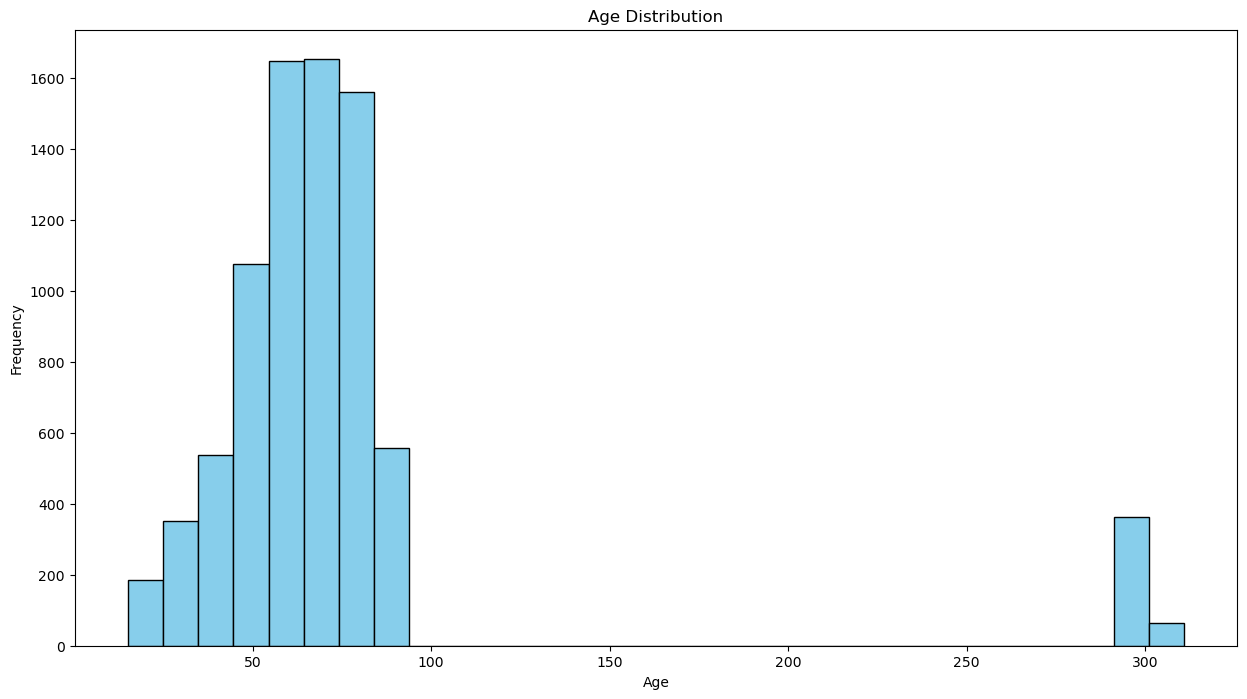

In [26]:
plt.figure(figsize=(15, 8))
plt.hist(mimic_train['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Taking a closer look, we observe the following: "Dates of birth for patients aged over 89 were shifted to obscure their true age and comply with HIPAA regulations" [source: https://physionet.org/content/mimiciii/1.4/]

So we create age groups (0 - 10, 10 - 20,... 90+) which we can then dummify and use for our predicitons

In [27]:
age_stats = mimic_train['Age'].describe()

print(age_stats)

count    8000.000000
mean       75.471250
std        55.849878
min        15.000000
25%        53.000000
50%        66.000000
75%        78.000000
max       311.000000
Name: Age, dtype: float64


In [28]:
mimic_train.shape

(8000, 24)

In [29]:
mimic_test.shape

(12885, 23)

In [30]:
# Define age bins and labels
# Define age bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float('inf')]  # setting last bin to capture all ages 90+
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Bin ages into age groups
mimic_train['AgeGroup'] = pd.cut(mimic_train['Age'], bins=age_bins, labels=age_labels, right=False)
mimic_test['AgeGroup'] = pd.cut(mimic_test['Age'], bins=age_bins, labels=age_labels, right=False)

# Create dummy variables for each age group, keeping other columns intact
mimic_train = pd.get_dummies(mimic_train, columns=['AgeGroup'], prefix='AgeGroup')
mimic_test = pd.get_dummies(mimic_test, columns=['AgeGroup'], prefix='AgeGroup')

mimic_train = mimic_train.drop(columns=['Age', 'ADMITTIME', 'DOB'], axis = 1)
mimic_test = mimic_test.drop(columns=['Age', 'ADMITTIME', 'DOB'], axis = 1)

print("added 10 age groups!")
print("dimensions of train after dummifying: ", mimic_train.shape , "\ndimensions of test and dummifying: ", mimic_test.shape)

added 10 age groups!
dimensions of train after dummifying:  (8000, 31) 
dimensions of test and dummifying:  (12885, 30)


In [31]:
mimic_train

,subject_id,hadm_id,icustay_id,HOSPITAL_EXPIRE_FLAG,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,GENDER,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,ETHNICITY,ICD9_diagnosis,FIRST_CAREUNIT,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+
0,36,165660,241249,0,6688,82.255814,115.609756,64.634146,76.365854,18.354167,37.477778,93.720930,106.000000,M,-44995.11045,ELECTIVE,Medicare,NOT SPECIFIED,WHITE,55321,MICU,False,False,False,False,False,False,False,True,False,False
1,85,112077,291697,0,10156,103.357143,104.700000,58.500000,69.033333,28.928571,37.229167,98.214286,114.000000,M,-58009.61759,EMERGENCY,Medicare,CATHOLIC,WHITE,0389,MICU,False,False,False,False,False,False,False,True,False,False
2,109,124398,249219,0,2484,91.312500,169.466667,97.200000,98.909091,18.125000,36.805556,97.357143,74.000000,F,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU,False,False,True,False,False,False,False,False,False,False
3,109,131345,243978,0,6451,87.038462,161.280000,102.040000,116.600000,19.653846,35.988889,98.720000,93.000000,F,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU,False,False,True,False,False,False,False,False,False,False
4,109,137510,246183,0,4050,76.312500,142.054054,84.702703,98.777778,16.107143,36.122222,97.806452,74.000000,F,-48600.94168,EMERGENCY,Medicaid,NOT SPECIFIED,BLACK/AFRICAN AMERICAN,40301,MICU,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,99955,108494,243255,1,5069,73.795455,122.954545,70.431818,82.113636,15.418182,38.341270,99.645833,257.833333,M,-46786.61687,EMERGENCY,Private,CATHOLIC,BLACK/AFRICAN AMERICAN,4321,SICU,False,False,False,False,False,False,True,False,False,False
7996,99966,167228,252173,0,8055,60.086957,132.083333,60.833333,77.791667,14.909091,36.111111,96.700000,83.000000,M,-65790.92355,EMERGENCY,Medicare,NOT SPECIFIED,WHITE,4260,CCU,False,False,False,False,False,False,False,True,False,False
7997,99983,117390,286606,0,9862,74.230769,110.450000,60.700000,74.700000,17.960000,36.574074,96.880000,120.666667,M,-66060.93291,EMERGENCY,Medicare,PROTESTANT QUAKER,UNKNOWN/NOT SPECIFIED,41001,CCU,False,False,False,False,False,False,False,True,False,False
7998,99985,176670,279638,0,9089,88.522727,116.790698,59.000000,76.604651,22.018182,38.064815,97.090909,106.500000,M,-61472.49049,EMERGENCY,Private,JEWISH,WHITE,0389,MICU,False,False,False,False,False,True,False,False,False,False


We now dummify the remaining impactful categorical features.

In [32]:
#dummify ICD9
mimic_train = pd.get_dummies(mimic_train, prefix=['ICD9'], columns=['ICD9_diagnosis'])
mimic_test = pd.get_dummies(mimic_test, prefix=['ICD9'], columns=['ICD9_diagnosis'])


#dummify gender, we comment this out since it made our model worse!
#mimic_train = pd.get_dummies(mimic_train, prefix=['gender'], columns=['GENDER'])
#mimic_test = pd.get_dummies(mimic_test, prefix=['gender'], columns=['GENDER'])

#dummify Admission type: We did not do this on the first few kaggle submissions but this logically increased accuracy a lot!
mimic_train = pd.get_dummies(mimic_train, prefix=['Admission_type'], columns=['ADMISSION_TYPE'])
mimic_test = pd.get_dummies(mimic_test, prefix=['Admission_type'], columns=['ADMISSION_TYPE'])

#dummify careunit:
mimic_train = pd.get_dummies(mimic_train, prefix=['First_careunit'], columns=['FIRST_CAREUNIT'])
mimic_test = pd.get_dummies(mimic_test, prefix=['First_careunit'], columns=['FIRST_CAREUNIT'])

#dummify ethnicity
mimic_train = pd.get_dummies(mimic_train, prefix=['Ethnicity'], columns=['ETHNICITY'])
mimic_test = pd.get_dummies(mimic_test, prefix=['Ethnicity'], columns=['ETHNICITY'])

#only select the columns which are numerical or boolean, this automatically gets rid of all the other non-numeric columns which we did not dummify
mimic_train_numerical = mimic_train.select_dtypes(include=['number', 'bool'])
mimic_test_numerical = mimic_test.select_dtypes(include=['number', 'bool'])


print("dimensions of train after dummifying: ", mimic_train_numerical.shape , "\ndimensions of test and dummifying: ", mimic_test_numerical.shape)

dimensions of train after dummifying:  (8000, 1368) 
dimensions of test and dummifying:  (12885, 1678)


In [33]:
pd.set_option('display.max_columns', 100)

mimic_train_numerical.head()

,subject_id,hadm_id,icustay_id,HOSPITAL_EXPIRE_FLAG,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,Diff,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+,ICD9_00845,ICD9_0088,ICD9_0090,ICD9_0091,ICD9_01325,ICD9_01505,ICD9_0312,ICD9_0360,ICD9_0380,ICD9_03811,ICD9_03812,ICD9_03819,ICD9_0382,ICD9_0383,ICD9_03840,ICD9_03842,ICD9_03843,ICD9_03844,ICD9_03849,ICD9_0388,ICD9_0389,ICD9_0398,ICD9_04082,ICD9_04104,ICD9_04111,ICD9_0414,...,ICD9_V8741,ICD9_V8801,Admission_type_ELECTIVE,Admission_type_EMERGENCY,Admission_type_URGENT,First_careunit_CCU,First_careunit_CSRU,First_careunit_MICU,First_careunit_SICU,First_careunit_TSICU,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,Ethnicity_ASIAN,Ethnicity_ASIAN - ASIAN INDIAN,Ethnicity_ASIAN - CAMBODIAN,Ethnicity_ASIAN - CHINESE,Ethnicity_ASIAN - FILIPINO,Ethnicity_ASIAN - JAPANESE,Ethnicity_ASIAN - KOREAN,Ethnicity_ASIAN - THAI,Ethnicity_ASIAN - VIETNAMESE,Ethnicity_BLACK/AFRICAN,Ethnicity_BLACK/AFRICAN AMERICAN,Ethnicity_BLACK/CAPE VERDEAN,Ethnicity_BLACK/HAITIAN,Ethnicity_CARIBBEAN ISLAND,Ethnicity_HISPANIC OR LATINO,Ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),Ethnicity_HISPANIC/LATINO - COLOMBIAN,Ethnicity_HISPANIC/LATINO - CUBAN,Ethnicity_HISPANIC/LATINO - DOMINICAN,Ethnicity_HISPANIC/LATINO - GUATEMALAN,Ethnicity_HISPANIC/LATINO - HONDURAN,Ethnicity_HISPANIC/LATINO - MEXICAN,Ethnicity_HISPANIC/LATINO - PUERTO RICAN,Ethnicity_HISPANIC/LATINO - SALVADORAN,Ethnicity_MIDDLE EASTERN,Ethnicity_MULTI RACE ETHNICITY,Ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Ethnicity_OTHER,Ethnicity_PATIENT DECLINED TO ANSWER,Ethnicity_PORTUGUESE,Ethnicity_SOUTH AMERICAN,Ethnicity_UNABLE TO OBTAIN,Ethnicity_UNKNOWN/NOT SPECIFIED,Ethnicity_WHITE,Ethnicity_WHITE - BRAZILIAN,Ethnicity_WHITE - EASTERN EUROPEAN,Ethnicity_WHITE - OTHER EUROPEAN,Ethnicity_WHITE - RUSSIAN
0,36,165660,241249,0,6688,82.255814,115.609756,64.634146,76.365854,18.354167,37.477778,93.720930,106.0,-44995.11045,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,85,112077,291697,0,10156,103.357143,104.700000,58.500000,69.033333,28.928571,37.229167,98.214286,114.0,-58009.61759,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,109,124398,249219,0,2484,91.312500,169.466667,97.200000,98.909091,18.125000,36.805556,97.357143,74.0,-48600.94168,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,109,131345,243978,0,6451,87.038462,161.280000,102.04

We now start imputing for the (selected) features where it makes sense. For these, we use the median to impute missing values. They are all the numerical columns except columns that include IDs  or codes which can strictly also be numerical. For imputation, we also tried other methods such as mean or even 'Last observation' but it did not improve the model.

In [34]:
numerical_cols =['HeartRate_Mean','SysBP_Mean',
       'DiasBP_Mean', 'MeanBP_Mean', 'RespRate_Mean','TempC_Mean', 'SpO2_Mean','Glucose_Mean']
for my_col in numerical_cols:
  mimic_test_numerical[my_col].fillna(mimic_test_numerical[my_col].median(), inplace=True)
  mimic_train_numerical[my_col].fillna(mimic_train_numerical[my_col].median(), inplace=True)

/tmp/ipykernel_50774/2582468735.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mimic_test_numerical[my_col].fillna(mimic_test_numerical[my_col].median(), inplace=True)
/tmp/ipykernel_50774/2582468735.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [35]:
#let's see how many nulls we are left with
nulls=mimic_train_numerical.isnull().sum()
missing_data_col= mimic_train_numerical.columns[nulls>0]
missing_data_col #looks good!

Index([], dtype='object')

In [36]:
print("dimensions of train and dummifying: ", mimic_train_numerical.shape , "\ndimensions of test and dummifying: ", mimic_test_numerical.shape)

dimensions of train and dummifying:  (8000, 1368) 
dimensions of test and dummifying:  (12885, 1678)


### Training and test dataset

To make Cross validation possible to tune hyperparameters and at the same time check metrics like accuracy, we split the data into training and testing set. 

This can be confusing at first glance because we basically have the test set from kaggle (already) and the test set that is created by us. Unfortunately though, this is necessary because we do not have access to the dependend variables - the y values - in the provided test dataset. We need this to access performance scores! The data that we use for predictions and ultimately upload to Kaggle - the test data from Kaggle, is therefor from nowon denoted as X_pred or Kaggle predictions to avoid confusion.

Before that, let's drop the identifying columns which we used for data prep but we do not use for the model fitting

In [37]:
mimic_train_numerical=mimic_train_numerical.drop(['subject_id', 'hadm_id' ], axis=1) #only Icustay_id remains because we need these in our kaggle predictions
mimic_test_numerical=mimic_test_numerical.drop(['subject_id', 'hadm_id'], axis=1)#only Icustay_id remains because we need these in our kaggle predictions

Now we do the model splitting as mentioned before:
NOTE: This can severly impact the model performance as we are using a lot less data to work with. However, I still chose to do it because I want to have explicit access to performance measures like recall, accuracy and auc.

In [38]:
# Split training set in X and y to fit a model
X = mimic_train_numerical.drop(['HOSPITAL_EXPIRE_FLAG'], axis=1)
y = mimic_train_numerical["HOSPITAL_EXPIRE_FLAG"]  # This is the classification outcome: dead/not dead
from sklearn.model_selection import train_test_split
X = X.loc[y.index]  # Ensure X is aligned with y after dropping NaNs

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Alternatively, if we did not want to do any splits and we did not care about model performance, we can comment this the code chunk before out and uncomment the one below 

In [39]:
#used if we do not want to access model performance/split the data:
#X_train = mimic_train_numerical.drop(['HOSPITAL_EXPIRE_FLAG'], axis=1)
#y_train = mimic_train_numerical["HOSPITAL_EXPIRE_FLAG"]
#X_test = mimic_test_numerical

We have to be careful when doing the predictions for Kaggle later. The columns of the Kaggle test data will not match ours. The dummyfying created different columns beceause we did not have the same observations in the columns that we dummified in the tst dataset and train dataset from Kaggle. We handle this below. Without this, we would not be able to make predictions!

In [40]:

print("Dimensions of data X to train the model: ", X_train.shape , "\nDimensions of data X used for Kaggle predictions: ", mimic_test_numerical.shape," Oh no! The number of columns should match with the number of columns used in trainig!","\nDimensions of test data X for predictions (of test data to see performance)", X_test.shape)

Dimensions of data X to train the model:  (6000, 1365) 
Dimensions of data X used for Kaggle predictions:  (12885, 1676)  Oh no! The number of columns should match with the number of columns used in trainig! 
Dimensions of test data X for predictions (of test data to see performance) (2000, 1365)


As we can see by the dimensions of the train and test data, the columns of the test and train data do not align. However, this is essential since the data used for fitting must have the same number of columns as the data which we are using to predict. 
Therefore, we see which are the common columns and only select those to train and test our data:

In [41]:

# align columns between training and test_data
common_columns = X.columns.intersection(mimic_test_numerical.columns)


X_train = X_train[common_columns]
X_test=X_test[common_columns]
X_pred=mimic_test_numerical[common_columns]
# Check shapes to confirm alignment
print("Dimensions of data X to train the model: ", X_train.shape , "\nDimensions of data X used for Kaggle predictions: ", X_pred.shape," yes! It matches!","\nDimensions of test data X for predictions (of test data to see performance)", X_test.shape)


Dimensions of data X to train the model:  (6000, 1030) 
Dimensions of data X used for Kaggle predictions:  (12885, 1030)  yes! It matches! 
Dimensions of test data X for predictions (of test data to see performance) (2000, 1030)


Alternatively, we can take the union instead of only the common columns. However, it did not improve results and complicated the code, so we comment it out.

In [42]:
'''
missing_in_train = mimic_test_numerical.columns.difference(X_train.columns)
missing_in_test = X_train.columns.difference(mimic_test_numerical.columns)

# Add missing columns with default values (e.g., 0) to align datasets
for col in missing_in_train:
    X_train[col] = 0
    X_test[col] = 0  # Add to X_test as well

for col in missing_in_test:
    mimic_test_numerical[col] = 0

# Reorder columns to match training data
X_train = X_train.sort_index(axis=1)
X_pred = mimic_test_numerical[X_train.columns]
X_test = X_test.sort_index(axis=1)
# Confirm that the shapes match
print("Dimensions of data X to train the model: ", X_train.shape)
print("Dimensions of data X used for Kaggle predictions: ", X_pred.shape)
print("\nDimensions of test data X for predictions (of test data to see performance)", X_test.shape)

'''

'\nmissing_in_train = mimic_test_numerical.columns.difference(X_train.columns)\nmissing_in_test = X_train.columns.difference(mimic_test_numerical.columns)\n\n# Add missing columns with default values (e.g., 0) to align datasets\nfor col in missing_in_train:\n    X_train[col] = 0\n    X_test[col] = 0  # Add to X_test as well\n\nfor col in missing_in_test:\n    mimic_test_numerical[col] = 0\n\n# Reorder columns to match training data\nX_train = X_train.sort_index(axis=1)\nX_pred = mimic_test_numerical[X_train.columns]\nX_test = X_test.sort_index(axis=1)\n# Confirm that the shapes match\nprint("Dimensions of data X to train the model: ", X_train.shape)\nprint("Dimensions of data X used for Kaggle predictions: ", X_pred.shape)\nprint("\nDimensions of test data X for predictions (of test data to see performance)", X_test.shape)\n\n'

In [43]:
X_train.head()

,icustay_id,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,Diff,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+,ICD9_00845,ICD9_0088,ICD9_0090,ICD9_0091,ICD9_01505,ICD9_0380,ICD9_03811,ICD9_03812,ICD9_03819,ICD9_0382,ICD9_0383,ICD9_03840,ICD9_03842,ICD9_03843,ICD9_03844,ICD9_03849,ICD9_0388,ICD9_0389,ICD9_04082,ICD9_042,ICD9_048,ICD9_0499,ICD9_0543,ICD9_07020,ICD9_07032,ICD9_07041,ICD9_07044,ICD9_07054,ICD9_07070,...,ICD9_V714,ICD9_V8741,Admission_type_ELECTIVE,Admission_type_EMERGENCY,Admission_type_URGENT,First_careunit_CCU,First_careunit_CSRU,First_careunit_MICU,First_careunit_SICU,First_careunit_TSICU,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,Ethnicity_ASIAN,Ethnicity_ASIAN - ASIAN INDIAN,Ethnicity_ASIAN - CAMBODIAN,Ethnicity_ASIAN - CHINESE,Ethnicity_ASIAN - FILIPINO,Ethnicity_ASIAN - JAPANESE,Ethnicity_ASIAN - KOREAN,Ethnicity_ASIAN - THAI,Ethnicity_ASIAN - VIETNAMESE,Ethnicity_BLACK/AFRICAN,Ethnicity_BLACK/AFRICAN AMERICAN,Ethnicity_BLACK/CAPE VERDEAN,Ethnicity_BLACK/HAITIAN,Ethnicity_CARIBBEAN ISLAND,Ethnicity_HISPANIC OR LATINO,Ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),Ethnicity_HISPANIC/LATINO - COLOMBIAN,Ethnicity_HISPANIC/LATINO - CUBAN,Ethnicity_HISPANIC/LATINO - DOMINICAN,Ethnicity_HISPANIC/LATINO - GUATEMALAN,Ethnicity_HISPANIC/LATINO - HONDURAN,Ethnicity_HISPANIC/LATINO - MEXICAN,Ethnicity_HISPANIC/LATINO - PUERTO RICAN,Ethnicity_HISPANIC/LATINO - SALVADORAN,Ethnicity_MIDDLE EASTERN,Ethnicity_MULTI RACE ETHNICITY,Ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Ethnicity_OTHER,Ethnicity_PATIENT DECLINED TO ANSWER,Ethnicity_PORTUGUESE,Ethnicity_SOUTH AMERICAN,Ethnicity_UNABLE TO OBTAIN,Ethnicity_UNKNOWN/NOT SPECIFIED,Ethnicity_WHITE,Ethnicity_WHITE - BRAZILIAN,Ethnicity_WHITE - EASTERN EUROPEAN,Ethnicity_WHITE - OTHER EUROPEAN,Ethnicity_WHITE - RUSSIAN
3836,248923,10191,97.865385,145.395833,84.770833,100.958333,23.423077,36.803030,93.673077,142.500000,-60327.48935,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6408,287725,8386,120.260870,119.100000,79.250000,86.523810,22.217391,36.324074,94.333333,139.000000,-36580.42211,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4840,242692,6177,68.000000,110.666667,49.407407,64.777778,21.481481,37.611111,97.851852,146.800000,-66013.46851,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
527,209452,9503,98.1

### Scaling and removing remaining non-numeric columns

In [44]:

numerical_cols =['HeartRate_Mean','SysBP_Mean',
       'DiasBP_Mean', 'MeanBP_Mean', 'RespRate_Mean','TempC_Mean', 'SpO2_Mean','Glucose_Mean','ICD9_encoded']


In [45]:
from sklearn import preprocessing
# Scale only numeric columns
scaler = preprocessing.StandardScaler()

# Fit the scaler on the training numeric data
scaler.fit(X_train[numerical_cols])  # Fit on numeric columns only

# Transform the training and test numeric data
X_train_scaled = X_train.copy()
X_pred_scaled = X_pred.copy()
X_test_scaled = X_test.copy()


X_train_scaled[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_pred_scaled[numerical_cols] = scaler.transform(X_pred[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Dimensions of scaled data X to train the model: ", X_train_scaled.shape , "\nDimensions of scaled data X used for predictions (of test data to see performance)", X_test_scaled.shape)


Dimensions of scaled data X to train the model:  (6000, 1030) 
Dimensions of scaled data X used for predictions (of test data to see performance) (2000, 1030)


We are now finished with feature engineering and can fit the model. Only feature *icustray_id* should technically not be included into the model as the ID should not be predictive, but we still decide to keep it as we need it for the kaggle predictions and it should not make our model worse. 

In [46]:
X_train_scaled.head()

,icustay_id,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,Diff,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+,ICD9_00845,ICD9_0088,ICD9_0090,ICD9_0091,ICD9_01505,ICD9_0380,ICD9_03811,ICD9_03812,ICD9_03819,ICD9_0382,ICD9_0383,ICD9_03840,ICD9_03842,ICD9_03843,ICD9_03844,ICD9_03849,ICD9_0388,ICD9_0389,ICD9_04082,ICD9_042,ICD9_048,ICD9_0499,ICD9_0543,ICD9_07020,ICD9_07032,ICD9_07041,ICD9_07044,ICD9_07054,ICD9_07070,...,ICD9_V714,ICD9_V8741,Admission_type_ELECTIVE,Admission_type_EMERGENCY,Admission_type_URGENT,First_careunit_CCU,First_careunit_CSRU,First_careunit_MICU,First_careunit_SICU,First_careunit_TSICU,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,Ethnicity_ASIAN,Ethnicity_ASIAN - ASIAN INDIAN,Ethnicity_ASIAN - CAMBODIAN,Ethnicity_ASIAN - CHINESE,Ethnicity_ASIAN - FILIPINO,Ethnicity_ASIAN - JAPANESE,Ethnicity_ASIAN - KOREAN,Ethnicity_ASIAN - THAI,Ethnicity_ASIAN - VIETNAMESE,Ethnicity_BLACK/AFRICAN,Ethnicity_BLACK/AFRICAN AMERICAN,Ethnicity_BLACK/CAPE VERDEAN,Ethnicity_BLACK/HAITIAN,Ethnicity_CARIBBEAN ISLAND,Ethnicity_HISPANIC OR LATINO,Ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),Ethnicity_HISPANIC/LATINO - COLOMBIAN,Ethnicity_HISPANIC/LATINO - CUBAN,Ethnicity_HISPANIC/LATINO - DOMINICAN,Ethnicity_HISPANIC/LATINO - GUATEMALAN,Ethnicity_HISPANIC/LATINO - HONDURAN,Ethnicity_HISPANIC/LATINO - MEXICAN,Ethnicity_HISPANIC/LATINO - PUERTO RICAN,Ethnicity_HISPANIC/LATINO - SALVADORAN,Ethnicity_MIDDLE EASTERN,Ethnicity_MULTI RACE ETHNICITY,Ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Ethnicity_OTHER,Ethnicity_PATIENT DECLINED TO ANSWER,Ethnicity_PORTUGUESE,Ethnicity_SOUTH AMERICAN,Ethnicity_UNABLE TO OBTAIN,Ethnicity_UNKNOWN/NOT SPECIFIED,Ethnicity_WHITE,Ethnicity_WHITE - BRAZILIAN,Ethnicity_WHITE - EASTERN EUROPEAN,Ethnicity_WHITE - OTHER EUROPEAN,Ethnicity_WHITE - RUSSIAN
3836,248923,0.483685,0.872184,1.694713,2.157264,2.248302,1.224899,0.096544,-1.381879,0.073504,-60327.48935,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6408,287725,0.079314,2.396201,0.014187,1.622501,0.863053,0.892295,-0.727790,-1.097251,-0.002393,-36580.42211,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4840,242692,-0.415564,-1.160162,-0.524775,-1.268133,-1.223864,0.689285,1.487336,0.419540,0.166748,-66013.46851,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
527,209452,0.329553,0.889350,-1.

In [47]:
X_test_scaled.head()


,icustay_id,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,Diff,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+,ICD9_00845,ICD9_0088,ICD9_0090,ICD9_0091,ICD9_01505,ICD9_0380,ICD9_03811,ICD9_03812,ICD9_03819,ICD9_0382,ICD9_0383,ICD9_03840,ICD9_03842,ICD9_03843,ICD9_03844,ICD9_03849,ICD9_0388,ICD9_0389,ICD9_04082,ICD9_042,ICD9_048,ICD9_0499,ICD9_0543,ICD9_07020,ICD9_07032,ICD9_07041,ICD9_07044,ICD9_07054,ICD9_07070,...,ICD9_V714,ICD9_V8741,Admission_type_ELECTIVE,Admission_type_EMERGENCY,Admission_type_URGENT,First_careunit_CCU,First_careunit_CSRU,First_careunit_MICU,First_careunit_SICU,First_careunit_TSICU,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,Ethnicity_ASIAN,Ethnicity_ASIAN - ASIAN INDIAN,Ethnicity_ASIAN - CAMBODIAN,Ethnicity_ASIAN - CHINESE,Ethnicity_ASIAN - FILIPINO,Ethnicity_ASIAN - JAPANESE,Ethnicity_ASIAN - KOREAN,Ethnicity_ASIAN - THAI,Ethnicity_ASIAN - VIETNAMESE,Ethnicity_BLACK/AFRICAN,Ethnicity_BLACK/AFRICAN AMERICAN,Ethnicity_BLACK/CAPE VERDEAN,Ethnicity_BLACK/HAITIAN,Ethnicity_CARIBBEAN ISLAND,Ethnicity_HISPANIC OR LATINO,Ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),Ethnicity_HISPANIC/LATINO - COLOMBIAN,Ethnicity_HISPANIC/LATINO - CUBAN,Ethnicity_HISPANIC/LATINO - DOMINICAN,Ethnicity_HISPANIC/LATINO - GUATEMALAN,Ethnicity_HISPANIC/LATINO - HONDURAN,Ethnicity_HISPANIC/LATINO - MEXICAN,Ethnicity_HISPANIC/LATINO - PUERTO RICAN,Ethnicity_HISPANIC/LATINO - SALVADORAN,Ethnicity_MIDDLE EASTERN,Ethnicity_MULTI RACE ETHNICITY,Ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Ethnicity_OTHER,Ethnicity_PATIENT DECLINED TO ANSWER,Ethnicity_PORTUGUESE,Ethnicity_SOUTH AMERICAN,Ethnicity_UNABLE TO OBTAIN,Ethnicity_UNKNOWN/NOT SPECIFIED,Ethnicity_WHITE,Ethnicity_WHITE - BRAZILIAN,Ethnicity_WHITE - EASTERN EUROPEAN,Ethnicity_WHITE - OTHER EUROPEAN,Ethnicity_WHITE - RUSSIAN
2215,284564,-1.763989,1.070817,-0.292574,0.752351,1.045624,-0.096061,0.021210,0.441142,0.095189,-33693.77487,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2582,240043,-1.523383,1.137841,1.003293,1.128874,1.691258,0.407920,0.230656,0.748690,-0.161414,-34061.84086,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1662,246786,-0.725619,-0.073627,-0.141657,-0.105121,-0.129038,-0.162455,-0.032945,0.110572,1.992604,-50276.52371,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3027,209495,1.409593,0.041543

Let's create sperate datasets for only frequency encoding/only dummifying.

In [48]:
#Drop all columns that start with 'ICD9' except 'ICD9_encoded'
X_train_scaled_freq = X_train_scaled.drop(X_train_scaled.filter(regex='^ICD9').columns.difference(['ICD9_encoded']), axis=1)
X_pred_scaled_freq = X_pred_scaled.drop(X_pred_scaled.filter(regex='^ICD9').columns.difference(['ICD9_encoded']), axis=1)
X_test_scaled_freq = X_test_scaled.drop(X_test_scaled.filter(regex='^ICD9').columns.difference(['ICD9_encoded']), axis=1)
#print("Dimensions of scaled data X to train the model: ", X_train_scaled_freq.shape , "\nDimensions of scaled data X used for predictions (of test data to see performance)", X_pred_scaled_freq.shape)

#Drop the encoding column for the dataframe where we only use dummification
X_train_scaled.head()
X_train_scaled_dummy=X_train_scaled.drop('ICD9_encoded', axis = 1)
X_pred_scaled_dummy=X_pred_scaled.drop('ICD9_encoded', axis = 1)
X_test_scaled_dummy=X_test_scaled.drop('ICD9_encoded', axis = 1)

In [49]:
X_train_scaled_dummy

,icustay_id,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,Diff,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+,ICD9_00845,ICD9_0088,ICD9_0090,ICD9_0091,ICD9_01505,ICD9_0380,ICD9_03811,ICD9_03812,ICD9_03819,ICD9_0382,ICD9_0383,ICD9_03840,ICD9_03842,ICD9_03843,ICD9_03844,ICD9_03849,ICD9_0388,ICD9_0389,ICD9_04082,ICD9_042,ICD9_048,ICD9_0499,ICD9_0543,ICD9_07020,ICD9_07032,ICD9_07041,ICD9_07044,ICD9_07054,ICD9_07070,ICD9_0785,...,ICD9_V714,ICD9_V8741,Admission_type_ELECTIVE,Admission_type_EMERGENCY,Admission_type_URGENT,First_careunit_CCU,First_careunit_CSRU,First_careunit_MICU,First_careunit_SICU,First_careunit_TSICU,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,Ethnicity_ASIAN,Ethnicity_ASIAN - ASIAN INDIAN,Ethnicity_ASIAN - CAMBODIAN,Ethnicity_ASIAN - CHINESE,Ethnicity_ASIAN - FILIPINO,Ethnicity_ASIAN - JAPANESE,Ethnicity_ASIAN - KOREAN,Ethnicity_ASIAN - THAI,Ethnicity_ASIAN - VIETNAMESE,Ethnicity_BLACK/AFRICAN,Ethnicity_BLACK/AFRICAN AMERICAN,Ethnicity_BLACK/CAPE VERDEAN,Ethnicity_BLACK/HAITIAN,Ethnicity_CARIBBEAN ISLAND,Ethnicity_HISPANIC OR LATINO,Ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),Ethnicity_HISPANIC/LATINO - COLOMBIAN,Ethnicity_HISPANIC/LATINO - CUBAN,Ethnicity_HISPANIC/LATINO - DOMINICAN,Ethnicity_HISPANIC/LATINO - GUATEMALAN,Ethnicity_HISPANIC/LATINO - HONDURAN,Ethnicity_HISPANIC/LATINO - MEXICAN,Ethnicity_HISPANIC/LATINO - PUERTO RICAN,Ethnicity_HISPANIC/LATINO - SALVADORAN,Ethnicity_MIDDLE EASTERN,Ethnicity_MULTI RACE ETHNICITY,Ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Ethnicity_OTHER,Ethnicity_PATIENT DECLINED TO ANSWER,Ethnicity_PORTUGUESE,Ethnicity_SOUTH AMERICAN,Ethnicity_UNABLE TO OBTAIN,Ethnicity_UNKNOWN/NOT SPECIFIED,Ethnicity_WHITE,Ethnicity_WHITE - BRAZILIAN,Ethnicity_WHITE - EASTERN EUROPEAN,Ethnicity_WHITE - OTHER EUROPEAN,Ethnicity_WHITE - RUSSIAN
3836,248923,0.872184,1.694713,2.157264,2.248302,1.224899,0.096544,-1.381879,0.073504,-60327.48935,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6408,287725,2.396201,0.014187,1.622501,0.863053,0.892295,-0.727790,-1.097251,-0.002393,-36580.42211,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4840,242692,-1.160162,-0.524775,-1.268133,-1.223864,0.689285,1.487336,0.419540,0.166748,-66013.46851,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
527,209452,0.889350,-1.174510,-0.432244,-0.70

## Model Fitting

### Cross-Validation (long computational time!)

Here is the part where we can do a lot of adjusting in terms of parameters. 

To summarize, I tried the following to improve the model performance:

- use different number of neighbours. I started out with a general grid like [1,20, 50, 100, 200, 500] and then after getting 20 as optimal neighbours narrowed it down to reduce computational time and be more exact
- Try different scoring methods. As seen in the output, Accuracy or auc makes most sense because recall resulted into a number of neighbours 1. Furthermore, auc is the score that we want to focus on in kaggle.
- Loop through different algorithms and see which one is the best one. This was also intended to be used for the final model myKNN, but it unfortunately gave us too high computational times. We theirfor sticked to 'auto' which gave us similiar results.
- Check different scoring systems for the CV: We decided to go with roc_auc so we set the number of folds low in the others to avoid long computational times
- IMPORTANT: Try different number of folds. In higher **number of folds** gave us better results so that is why we have 200. **This can be changed to adjust computational time**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  cross_val_score

#choose the best algorithm
algorithms = ['ball_tree', 'kd_tree', 'brute', 'auto']
best_algorithm = None
best_score = 0

for algo in algorithms:
    knn = KNeighborsClassifier(algorithm=algo)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    print(f"Algorithm: {algo}, Mean Accuracy: {mean_score:.4f}")

    if mean_score > best_score:
        best_score = mean_score
        best_algorithm = algo

print(f"Best Algorithm: {best_algorithm} with Mean Accuracy: {best_score:.4f}")


# Define KNN Classifier
MyKNN = KNeighborsClassifier(algorithm='auto') #efficient but theoretically not as good as ball_tree
MyKNN2 = KNeighborsClassifier(algorithm='auto') #efficient but theoretically not as good as ball_tree
MyKNN3 = KNeighborsClassifier(algorithm='auto') #efficient but theoretically not as good as ball_tree

# Define the grid of hyperparameters to search
grid_values = {
    'n_neighbors': [1,5, 10, 11,12, 13,14,15, 25, 30, 50, 70, 100, 150, 250], #Adjusted based on insights
    'weights': ['uniform', 'distance']
}

# Set up GridSearchCV for dummified ICD_9 and encoded
grid_knn_acc = GridSearchCV(MyKNN, param_grid=grid_values, scoring='accuracy', cv=5)
grid_knn_recall = GridSearchCV(MyKNN, param_grid=grid_values, scoring='recall', cv=5)
grid_knn_roc_auc = GridSearchCV(MyKNN, param_grid=grid_values, scoring='roc_auc', cv=200) #ADJUST TO SAFE COMPUTATIONAL TIME
# Gridsearch for frequency encoding
grid_knn_acc_freq = GridSearchCV(MyKNN2, param_grid=grid_values, scoring='accuracy', cv=5)
grid_knn_recall_freq = GridSearchCV(MyKNN2, param_grid=grid_values, scoring='recall', cv=5)
grid_knn_roc_auc_freq = GridSearchCV(MyKNN2, param_grid=grid_values, scoring='roc_auc', cv=200)#ADJUST TO SAFE COMPUTATIONAL TIME
# Gridsearch for dummified
grid_knn_acc_dummy = GridSearchCV(MyKNN2, param_grid=grid_values, scoring='accuracy', cv=5)
grid_knn_recall_dummy = GridSearchCV(MyKNN2, param_grid=grid_values, scoring='recall', cv=5)
grid_knn_roc_auc_dummy = GridSearchCV(MyKNN3, param_grid=grid_values, scoring='roc_auc', cv=200)#ADJUST TO SAFE COMPUTATIONAL TIME



# Fit GridSearchCV
grid_knn_acc.fit(X_train_scaled, y_train)  
grid_knn_recall.fit(X_train_scaled, y_train)
grid_knn_roc_auc.fit(X_train_scaled, y_train) 
# Fit GridSearchCV on freq encoding
grid_knn_acc_freq.fit(X_train_scaled_freq, y_train)  
grid_knn_recall_freq.fit(X_train_scaled_freq, y_train) 
grid_knn_roc_auc_freq.fit(X_train_scaled_freq, y_train) 


# Fit GridSearchCV on dummifying
grid_knn_acc_dummy.fit(X_train_scaled_dummy, y_train) 
grid_knn_recall_dummy.fit(X_train_scaled_dummy, y_train) 
grid_knn_roc_auc_dummy.fit(X_train_scaled_dummy, y_train)  


# Print the best hyperparameters
print("Dummy and frequency: Best Hyperparameters when using Accuracy:", grid_knn_acc.best_params_, "\nBest Hpyterparameters when using RECALL:", grid_knn_recall.best_params_, "\nBest Hyperparameters when using roc_auc:", grid_knn_roc_auc.best_params_)
print("Frequency: Best Hyperparameters when using Accuracy:", grid_knn_acc_freq.best_params_, "\nBest Hyperparameters when using RECALL:", grid_knn_recall_freq.best_params_, "\nBest Hyperparameters when using roc_auc:", grid_knn_roc_auc_freq.best_params_)
print("Dummy: Best Hyperparameters when using Accuracy:", grid_knn_acc_dummy.best_params_, "\nBest Hyperparameters when using RECALL:", grid_knn_recall_dummy.best_params_, "\nBest Hyperparameters when using roc_auc:", grid_knn_roc_auc_dummy.best_params_)

Algorithm: ball_tree, Mean Accuracy: 0.8698
Algorithm: kd_tree, Mean Accuracy: 0.8698
Algorithm: brute, Mean Accuracy: 0.8698
Algorithm: auto, Mean Accuracy: 0.8698
Best Algorithm: ball_tree with Mean Accuracy: 0.8698


In [ ]:
X_test_scaled

,icustay_id,ICD9_encoded,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,TempC_Mean,SpO2_Mean,Glucose_Mean,Diff,AgeGroup_0-9,AgeGroup_10-19,AgeGroup_20-29,AgeGroup_30-39,AgeGroup_40-49,AgeGroup_50-59,AgeGroup_60-69,AgeGroup_70-79,AgeGroup_80-89,AgeGroup_90+,ICD9_00845,ICD9_0088,ICD9_0090,ICD9_0091,ICD9_01505,ICD9_0380,ICD9_03811,ICD9_03812,ICD9_03819,ICD9_0382,ICD9_0383,ICD9_03840,ICD9_03842,ICD9_03843,ICD9_03844,ICD9_03849,ICD9_0388,ICD9_0389,ICD9_04082,ICD9_042,ICD9_048,ICD9_0499,ICD9_0543,ICD9_07020,ICD9_07032,ICD9_07041,ICD9_07044,ICD9_07054,ICD9_07070,...,ICD9_V714,ICD9_V8741,Admission_type_ELECTIVE,Admission_type_EMERGENCY,Admission_type_URGENT,First_careunit_CCU,First_careunit_CSRU,First_careunit_MICU,First_careunit_SICU,First_careunit_TSICU,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE,Ethnicity_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,Ethnicity_ASIAN,Ethnicity_ASIAN - ASIAN INDIAN,Ethnicity_ASIAN - CAMBODIAN,Ethnicity_ASIAN - CHINESE,Ethnicity_ASIAN - FILIPINO,Ethnicity_ASIAN - JAPANESE,Ethnicity_ASIAN - KOREAN,Ethnicity_ASIAN - THAI,Ethnicity_ASIAN - VIETNAMESE,Ethnicity_BLACK/AFRICAN,Ethnicity_BLACK/AFRICAN AMERICAN,Ethnicity_BLACK/CAPE VERDEAN,Ethnicity_BLACK/HAITIAN,Ethnicity_CARIBBEAN ISLAND,Ethnicity_HISPANIC OR LATINO,Ethnicity_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),Ethnicity_HISPANIC/LATINO - COLOMBIAN,Ethnicity_HISPANIC/LATINO - CUBAN,Ethnicity_HISPANIC/LATINO - DOMINICAN,Ethnicity_HISPANIC/LATINO - GUATEMALAN,Ethnicity_HISPANIC/LATINO - HONDURAN,Ethnicity_HISPANIC/LATINO - MEXICAN,Ethnicity_HISPANIC/LATINO - PUERTO RICAN,Ethnicity_HISPANIC/LATINO - SALVADORAN,Ethnicity_MIDDLE EASTERN,Ethnicity_MULTI RACE ETHNICITY,Ethnicity_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,Ethnicity_OTHER,Ethnicity_PATIENT DECLINED TO ANSWER,Ethnicity_PORTUGUESE,Ethnicity_SOUTH AMERICAN,Ethnicity_UNABLE TO OBTAIN,Ethnicity_UNKNOWN/NOT SPECIFIED,Ethnicity_WHITE,Ethnicity_WHITE - BRAZILIAN,Ethnicity_WHITE - EASTERN EUROPEAN,Ethnicity_WHITE - OTHER EUROPEAN,Ethnicity_WHITE - RUSSIAN
2215,284564,-1.763989,1.070817,-0.292574,0.752351,1.045624,-0.096061,0.021210,0.441142,0.095189,-33693.77487,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2582,240043,-1.523383,1.137841,1.003293,1.128874,1.691258,0.407920,0.230656,0.748690,-0.161414,-34061.84086,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1662,246786,-0.725619,-0.073627,-0.141657,-0.105121,-0.129038,-0.162455,-0.032945,0.110572,1.992604,-50276.52371,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3027,209495,1.409593,0.041543

## Predictions

### General model (dummies and frequency encoding)

In [ ]:
y_pred_acc = grid_knn_roc_auc.predict(X_test_scaled) #Note that these are not our final predictions of the Kaggle test dataset but predictions of our generated  test dataset!
y_pred_proba = grid_knn_roc_auc.predict_proba(X_test_scaled)[:, 1]#Note that these are not our final predictions of the Kaggle test dataset but predictions of our generated  test dataset!
print("Dimensions of data X to train the model: ", X_train_scaled.shape , "\nDimensions of data X used for Kaggle predictions: ", X_pred_scaled.shape,"\nDimensions of data X used for predictions (of test data to see performance)", X_test_scaled.shape, "\nDimensions of predictions Y of testing data:", len(y_pred_acc))


Dimensions of data X to train the model:  (6000, 1030) 
Dimensions of data X used for Kaggle predictions:  (12885, 1030) 
Dimensions of data X used for predictions (of test data to see performance) (2000, 1030) 
Dimensions of predictions Y of testing data: 2000


### Frequency encoding model

In [ ]:
y_pred_acc_freq = grid_knn_roc_auc_freq.predict(X_test_scaled_freq) #Note that these are not our final predictions of the Kaggle test dataset but predictions of our generated  test dataset!
y_pred_proba_freq = grid_knn_roc_auc_freq.predict_proba(X_test_scaled_freq)[:, 1]#Note that these are not our final predictions of the Kaggle test dataset but predictions of our generated  test dataset!
print("Dimensions of data X to train the model: ", X_train_scaled_freq.shape , "\nDimensions of data X used for Kaggle predictions: ", X_pred_scaled_freq.shape,"\nDimensions of data X used for predictions (of test data to see performance)", X_test_scaled_freq.shape, "\nDimensions of predictions Y of testing data:", len(y_pred_acc))


Dimensions of data X to train the model:  (6000, 69) 
Dimensions of data X used for Kaggle predictions:  (12885, 69) 
Dimensions of data X used for predictions (of test data to see performance) (2000, 69) 
Dimensions of predictions Y of testing data: 2000


### Dummy Model

In [ ]:
y_pred_acc_dummy = grid_knn_roc_auc_dummy.predict(X_test_scaled_dummy) #Note that these are not our final predictions of the Kaggle test dataset but predictions of our generated  test dataset!
y_pred_proba_dummy = grid_knn_roc_auc_dummy.predict_proba(X_test_scaled_dummy)[:, 1]#Note that these are not our final predictions of the Kaggle test dataset but predictions of our generated  test dataset!
print("Dimensions of data X to train the model: ", X_train_scaled_dummy.shape , "\nDimensions of data X used for Kaggle predictions: ", X_pred_scaled_freq.shape,"\nDimensions of data X used for predictions (of test data to see performance)", X_test_scaled_freq.shape, "\nDimensions of predictions Y of testing data:", len(y_pred_acc))


Dimensions of data X to train the model:  (6000, 1029) 
Dimensions of data X used for Kaggle predictions:  (12885, 69) 
Dimensions of data X used for predictions (of test data to see performance) (2000, 69) 
Dimensions of predictions Y of testing data: 2000


#### Propabilities

In [ ]:

y_pred_proba

array([0.10828303, 0.        , 0.        , ..., 0.        , 0.39279119,
       0.23760695])

In [ ]:
y_pred_proba_freq

array([0.1082825 , 0.        , 0.        , ..., 0.        , 0.39279165,
       0.23759967])

## Model Performance

### General model (dummies and frequency encoding)

In [ ]:
from sklearn.metrics import auc, accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_auc_score

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score: ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc_score)

Accuracy Score : 0.886
Precision Score: 0.043478260869565216
Recall Score : 0.004830917874396135
F1 Score : 0.008695652173913044
AUC: 0.490894541574723


### Frequency encoding model

In [ ]:
from sklearn.metrics import auc, accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_auc_score

print('Accuracy Score when frequency encoding: ' + str(accuracy_score(y_test,y_pred_acc_freq)))
print('Precision Score when frequency encoding: ' + str(precision_score(y_test,y_pred_acc_freq)))
print('Recall Score when frequency encoding: ' + str(recall_score(y_test,y_pred_acc_freq)))
print('F1 Score when frequency encoding: ' + str(f1_score(y_test,y_pred_acc_freq)))

auc_score = roc_auc_score(y_test, y_pred_proba_freq)
print("AUC only frequency encoding:", auc_score)

Accuracy Score when frequency encoding: 0.886
Precision Score when frequency encoding: 0.043478260869565216
Recall Score when frequency encoding: 0.004830917874396135
F1 Score when frequency encoding: 0.008695652173913044
AUC only frequency encoding: 0.49089184725354373


### Dummy Model

In [ ]:
from sklearn.metrics import auc, accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_auc_score

print('Accuracy Score when dummifying: ' + str(accuracy_score(y_test,y_pred_acc_dummy)))
print('Precision Score when dummifying: ' + str(precision_score(y_test,y_pred_acc_dummy)))
print('Recall Score when dummifying: ' + str(recall_score(y_test,y_pred_acc_dummy)))
print('F1 Score when dummifying: ' + str(f1_score(y_test,y_pred_acc_dummy)))

auc_score = roc_auc_score(y_test, y_pred_proba_dummy)
print("AUC only dummifying:", auc_score)

Accuracy Score when dummifying: 0.886
Precision Score when dummifying: 0.043478260869565216
Recall Score when dummifying: 0.004830917874396135
F1 Score when dummifying: 0.008695652173913044
AUC only dummifying: 0.490894541574723


Interestingly, our model performance does not change if we use frequency encoding instead of dummifying. But when changing parameters, including or excluding different features, we notice how the model that uses both scores highest. So we decide to use this for the kaggle predictions.

However, it is extremely important to note here that dummifying was only done for the 'main diagnosis' variable. So all the other diagnoses for each individual which we obtained in mimic_diagnoses are not used when dummifying.
They are only used in frequency encoding.

All in all, this measures can be used to tune hyperparameters or also to see how handling missing data can be improved in different ways. For example, using different fillna methods other than 'median' changes the trainingdata and therefore the performance of the model!


It is also important to note, that the model performance might be significantly negatively impacted because we split the training set into another training and testing set to access these scores. We could now fit the model on the original training set but this is not done here since the goal of this project is not to produce the best possible predictions but to understand the processes and handle the data correctly.

Lastly, we can see how AUC is a lot worse than accuracy. This could be due to an imbalanced datasets. Accuracy can be misleading because it might reflect a model that is simply predicting the majority class well, while ignoring the minority class. The AUC takes however takes this into account. To adress the issue of class imbalance, we could apply some methods like oversampling the minority class.


After playing around with different imputations and hyperparameters, we are confident with our model performance and decide to use the test data "X_pred_scaled" from kaggle to make final predictions!


## Kaggle predictions

In [ ]:
#These are our final predictions which are uploaded to kaggle.
#Alternatively we could predict the class instead of probabilities!
#y_pred_acc = grid_knn_roc_auc.predict(X_pred_scaled)

y_pred_acc = grid_knn_roc_auc.predict_proba(X_pred_scaled)[:, 1]


# Save the file  path
test_predictions_submit = pd.DataFrame({"icustay_id": X_pred["icustay_id"], "HOSPITAL_EXPIRE_FLAG": y_pred_acc})
test_predictions_submit.to_csv("Data/predictions_1.4.csv", index=False)